In [73]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Loan Approvals Dataset
df = pd.read_csv('loan.csv')
df.columns = df.columns.str.strip() #remove excess white spacing from column names
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [75]:
#Data Cleaning: Transform Categorical columns to Numerical. Drop irrelevant columns.

df['education'] = (df['education'] == ' Graduate').astype(int)
df['self_employed'] = (df['self_employed'] == ' Yes').astype(int)
df['loan_status'] = (df['loan_status'] == ' Approved').astype(int)
df = df.drop(columns=['loan_id'])

df.head(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [76]:
#Initialize X matrix, y targets. Train test split + Scaling X matricies
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
#KNN

train_results = []
test_results = []
for k in range(0, 500, 10):
  if k == 0:
    continue
  # Initializing and fitting the KNN classifier
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)

  # Making predictions
  train_y_pred = knn.predict(X_train_scaled)
  test_y_pred = knn.predict(X_test_scaled)

  # Calculating the number of correct predictions
  test_error = 1 - np.mean(test_y_pred == y_test)
  test_results.append((k, test_error))

  train_error = 1 - np.mean(train_y_pred == y_train)
  train_results.append((k, train_error))
  print((k, np.round(train_error, 4), np.round(test_error, 4)))

(10, 0.072, 0.0948)
(20, 0.0717, 0.1007)
(30, 0.0726, 0.0925)
(40, 0.0709, 0.089)
(50, 0.0712, 0.089)
(60, 0.0753, 0.0913)
(70, 0.077, 0.0913)
(80, 0.0794, 0.0867)
(90, 0.0799, 0.0925)
(100, 0.0852, 0.0937)
(110, 0.0843, 0.0925)
(120, 0.0861, 0.096)
(130, 0.0876, 0.0913)
(140, 0.0896, 0.096)
(150, 0.0905, 0.0925)
(160, 0.0917, 0.0995)
(170, 0.0922, 0.0937)
(180, 0.0919, 0.0902)
(190, 0.094, 0.0937)
(200, 0.0937, 0.0972)
(210, 0.0943, 0.0984)
(220, 0.0955, 0.0984)
(230, 0.0975, 0.0972)
(240, 0.0993, 0.0995)
(250, 0.1013, 0.1042)
(260, 0.1031, 0.1042)
(270, 0.1045, 0.1042)
(280, 0.1075, 0.1054)
(290, 0.1107, 0.1066)
(300, 0.1116, 0.1066)
(310, 0.1145, 0.1101)
(320, 0.116, 0.1112)
(330, 0.1142, 0.1112)
(340, 0.1165, 0.1112)
(350, 0.1171, 0.1112)
(360, 0.1189, 0.1136)
(370, 0.1192, 0.1124)
(380, 0.1186, 0.1124)
(390, 0.1195, 0.1159)
(400, 0.1198, 0.1136)
(410, 0.1212, 0.1159)
(420, 0.1221, 0.1206)
(430, 0.1239, 0.123)
(440, 0.1242, 0.1241)
(450, 0.1259, 0.1253)
(460, 0.1274, 0.1265)
(470, 

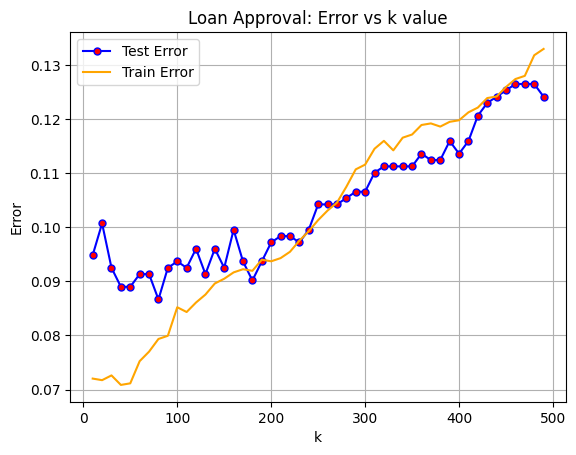

In [96]:
plt.plot([i[0] for i in test_results], [i[1] for i in test_results], color='blue', marker='o',
         markerfacecolor='red', markersize=5)

plt.plot([i[0] for i in train_results], [i[1] for i in train_results], color='orange')

plt.xlabel('k')
plt.ylabel('Error')
plt.title('Loan Approval: Error vs k value')
plt.legend(['Test Error', 'Train Error'])
plt.grid(True)
plt.show()

In [97]:
#top 3 k values
optimal_k = sorted(test_results, key=lambda x: x[1])[0]

optimal_k

(80, 0.0866510538641686)

In [88]:
#SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

test_results = []
train_results = []
# SVM with 1 (Linear), 2-7 Polynomial Kernelts
for poly in range (1, 8):
  svm_poly = SVC(kernel='poly', degree=poly)
  svm_poly.fit(X_train_scaled, y_train)
  test_poly_y_pred = svm_poly.predict(X_test_scaled)
  test_results.append((poly, 1-accuracy_score(y_test, test_poly_y_pred)))

  train_poly_y_pred = svm_poly.predict(X_train_scaled)
  train_results.append((poly, 1-accuracy_score(y_train, train_poly_y_pred)))

  if poly == 1:
    print('Linear Kernel Test Loss:', 1-np.mean(test_poly_y_pred == y_test))
  else:
    print(str(poly)+'-polynomial Kernel Test Loss:', 1-np.mean(test_poly_y_pred == y_test))

#SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
rbf_y_pred = svm_rbf.predict(X_test_scaled)
print('RBF Kernel Test Loss:', 1-np.mean(rbf_y_pred == y_test))
test_results.append((8, 1-np.mean(rbf_y_pred == y_test)))
train_results.append((8, 1-np.mean(svm_rbf.predict(X_train_scaled) == y_train)))


# top 3 kernel performers
svm_test_results = test_results.copy()
svm_test_results[0] = ('Linear', svm_test_results[0][1])
svm_test_results[7] = ('RBF', svm_test_results[7][1])
print('---------------------')
print('TOP 3 Optimal LOSS')
sorted(svm_test_results, key=lambda x: x[1])[:3]

Linear Kernel Test Loss: 0.07728337236533955
2-polynomial Kernel Test Loss: 0.35597189695550346
3-polynomial Kernel Test Loss: 0.08196721311475408
4-polynomial Kernel Test Loss: 0.2599531615925058
5-polynomial Kernel Test Loss: 0.12880562060889933
6-polynomial Kernel Test Loss: 0.2775175644028103
7-polynomial Kernel Test Loss: 0.19789227166276346
RBF Kernel Test Loss: 0.07611241217798592
---------------------
TOP 3 Optimal LOSS


[('RBF', 0.07611241217798592),
 ('Linear', 0.07728337236533955),
 (3, 0.08196721311475408)]

In [89]:
#Transform x back to be numerical for plotting
test_results[0] = (1, test_results[0][1])
test_results[7] = (8, test_results[7][1])

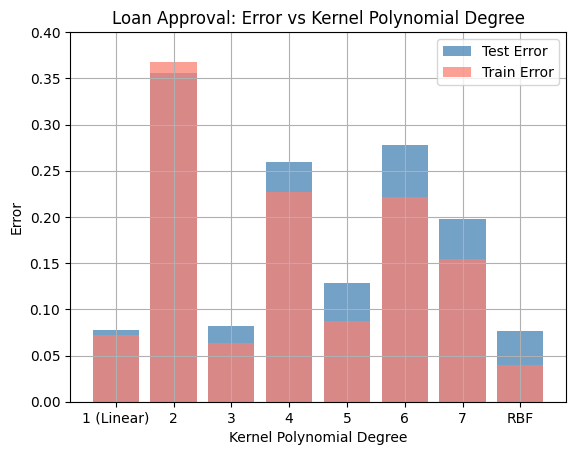

In [90]:
import matplotlib.pyplot as plt

test_poly_x = [x[0] for x in test_results]
test_poly_y = [x[1] for x in test_results]


train_poly_x = [x[0] for x in train_results]
train_poly_y = [x[1] for x in train_results]

#colors = ['seagreen' if x == 1 else 'steelblue' if 2 <= x <= 7 else 'salmon' for x in test_poly_x]

plt.bar(test_poly_x, test_poly_y, color='steelblue', alpha= 0.75)
plt.bar(train_poly_x, train_poly_y, color='salmon', alpha= 0.75)



plt.xlabel('Kernel Polynomial Degree')
plt.ylabel('Error')
plt.title('Loan Approval: Error vs Kernel Polynomial Degree')
plt.grid(True)
plt.legend(['Test Error', 'Train Error'])
plt.xticks(test_poly_x, [f'1 (Linear)' if x == 1 else f'RBF' if x == 8 else str(x) for x in test_poly_x])

plt.ylim(0, 0.4)

plt.show()


In [91]:
# top 3 kernel performers 1 = Linear, 8 = RBF
svm_test_results = test_results
svm_test_results[0] = ('Linear', test_results[0][1])
svm_test_results[7] = ('RBF', test_results[7][1])

sorted(svm_test_results, key=lambda x: x[1])[:3]

[('RBF', 0.07611241217798592),
 ('Linear', 0.07728337236533955),
 (3, 0.08196721311475408)]

In [83]:
#NN

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# 2 Hidden Layers, Input->32->16 Neurons, ReLu Hidden Activation, Sigmoid Output Activation
class NN(nn.Module):
    def __init__(self, input_size):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NN(input_size = X_train_tensor.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

test_losses = []
train_losses = []

epochs = 5000
for epoch in range(epochs):
    model.train()

    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor).item()

    if (epoch) % 500 == 0:
        print(f'Epoch {epoch}/{epochs}, BCE Train Loss: {loss.item():.4f}, BCE Test Loss: {test_loss:.4f}')
    if (epoch) % 10 == 0:
        train_losses.append((epoch, loss.item()))
        test_losses.append((epoch, test_loss))

Epoch 0/5000, BCE Train Loss: 0.6788, BCE Test Loss: 0.6730
Epoch 500/5000, BCE Train Loss: 0.1284, BCE Test Loss: 0.1297
Epoch 1000/5000, BCE Train Loss: 0.0831, BCE Test Loss: 0.1016
Epoch 1500/5000, BCE Train Loss: 0.0572, BCE Test Loss: 0.0953
Epoch 2000/5000, BCE Train Loss: 0.0405, BCE Test Loss: 0.1059
Epoch 2500/5000, BCE Train Loss: 0.0366, BCE Test Loss: 0.1209
Epoch 3000/5000, BCE Train Loss: 0.0290, BCE Test Loss: 0.1330
Epoch 3500/5000, BCE Train Loss: 0.0259, BCE Test Loss: 0.1421
Epoch 4000/5000, BCE Train Loss: 0.0225, BCE Test Loss: 0.1575
Epoch 4500/5000, BCE Train Loss: 0.0201, BCE Test Loss: 0.1641


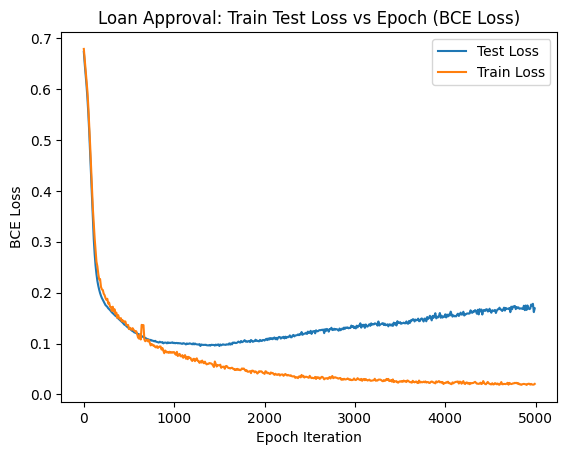

In [84]:
import matplotlib.pyplot as plt

# Extract epoch and loss values from test_losses
epochs_test = [loss[0] for loss in test_losses]
losses_test = [loss[1] for loss in test_losses]

# Extract epoch and loss values from train_losses
epochs_train = [loss[0] for loss in test_losses]
losses_train = [loss[1] for loss in train_losses]

# Plot test loss vs epoch
plt.plot(epochs_test, losses_test, label='Test Loss')

# Plot train loss vs epoch
plt.plot(epochs_train, losses_train, label='Train Loss')


plt.xlabel('Epoch Iteration')
plt.ylabel('BCE Loss')
plt.title('Loan Approval: Train Test Loss vs Epoch (BCE Loss)')
plt.legend()
plt.show()


In [85]:
optimal_epoch = sorted(test_losses, key=lambda x: x[1])[0]

optimal_epoch

(1290, 0.09526223689317703)

In [92]:
epochs = optimal_epoch[0]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NN(input_size = X_train_tensor.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    model.train()

    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor).item()
        if (epoch) == epochs - 1:
            print(f'Epoch {epoch + 1}, BCE Train Loss: {loss.item():.4f}, BCE Test Loss: {test_loss:.4f}')


# Final evaluation on test set
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_test_class = (y_pred_test > 0.5).float()
    loss = 1-(y_pred_test_class.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])).item()
    print(f'Epoch @ {epochs} Classification Loss: {loss}')

Epoch 1290, BCE Train Loss: 0.0777, BCE Test Loss: 0.0921
Epoch @ 1290 Classification Loss: 0.040983617305755615
